# CRM (Customer Relationship Management)

### * Customer Lifecycle/Journey/Funnel Optimizations
They are concepts that express the communication/interaction with customers with visual techniques and enable them to be tracked by various KPIs (Key Performance Indicators).
Example: We have a website, we sell products, and when the customer visits our site, this is a step of CRM. The user can become a member in the second step. In the third step, you can make a purchase. This first sales cycle is CRM.
After sales; Another process can also be designed, such as delivery, receiving comments from the seller, and making a second sale.

### * Communication Concept (language, color, visuals, campaigns)
It can be thought of as corporate marketing.

### * Customer Acquisition/Finding Studies
It refers to digital marketing methods or physical means such as billboards.

### * Customer Retention (or Churn) Studies

### * Cross-selling
Complementary product sales, 
up-sell: selling the larger product

### * Customer Segmentation Studies
Approaches according to customer type.

**NOTE: CRM ANALYTICS => To make all CRM studies data-based. It is about getting efficiency. It is a strategy development study.**

### * KPI (Key Performance Indicators)
These are mathematical indicators used to evaluate the performance of companies, departments or employees.
Examples:
1. Customer Acquisition Rate: It is the percentage of customers acquired within a certain time period.
2. Customer Retention Rate
3. Customer Churn Rate
4. Conversion Rate: If 10 people saw the ad and 1 person clicked on it, its CR is 1/10.
It is an attempt to mathematically track such interactions.
5. Growth Rate

#### Analysis of Cohort
It is the analysis of behavior of a group of people with common characteristics. Exs: Churn Rate, Retention Rate etc.

## 1) CRM - CUSTOMER LIFETIME VALUE

During the relationship-communication a customer establishes with a company,
It is the monetary value that the customer will bring to this company. Calculating these values sheds light for us to create budgets for marketing activities. After all; Our customers will be segmented when a ranking is made according to the CLTV values to be calculated for each customer and groups are created by dividing at certain points according to the CLTV values.

Raw Calculation = Average earnings per purchase(Avg. Order Value) * Purchase Frequency

### Data Prep
**Dataset Story**: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II <br>
The data set named Online Retail II includes the sales of a UK-based online sales store between 01/12/2009 and 09/12/2011.<br>
Variables: <br>
- InvoiceNo: Unique number for each transaction, i.e. invoice. If it starts with C, the transaction is cancelled.
- StockCode: Unique Product Code Number
- Description: Product Name
- Quantity: It indicates how many of the products on the invoices were sold.
- InvoiceDate: date and time
- UnitPrice: product price (Sterlin)
- CustomerID: unique number
- Country: Customer Residency

#### Imports

In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df_ = pd.read_excel("datasets/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df = df_.copy() # Code written to read the data set once and use its copy, in order to avoid having to read it at length from the beginning, in case of need.

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7.0,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom,30.0


In [4]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [5]:
# Since the C at the beginning of the invoice represents the Canceled ones, I must remove them from the dataset.
df = df[~df["Invoice"].str.contains("C", na=False)]
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,515255.00000,10.95663,-9600.00000,1.00000,3.00000,10.00000,19152.00000,104.35401
InvoiceDate,515255,2010-06-28 17:41:06.558422528,2009-12-01 07:45:00,2010-03-21 13:27:00,2010-07-06 13:13:00,2010-10-15 14:27:00,2010-12-09 20:01:00,NaN
Price,515255.00000,3.95637,-53594.36000,1.25000,2.10000,4.21000,25111.09000,127.68856
Customer ID,407695.00000,15368.50411,12346.00000,13997.00000,15321.00000,16812.00000,18287.00000,1679.79570


In [6]:
df = df[(df['Quantity'] > 0)] # I did this because I saw quantity min value in the table. There is no negative quantity.
df.dropna(inplace=True) # dropped missing values 

In [7]:
df["TotalPrice"] = df["Quantity"] * df["Price"] # TotalPrice values added as a new column (in the calculation result).

In [8]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65000,13085.00000,United Kingdom,39.60000
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95000,13085.00000,United Kingdom,59.50000
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55000,13085.00000,United Kingdom,30.60000
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75000,13085.00000,United Kingdom,45.00000


In [12]:
cltv_c = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(), # total transaction value calculation
                                        'Quantity': lambda y: y.sum(), # total purchased product item
                                        'TotalPrice': lambda z: z.sum()})

In [15]:
cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']

In [18]:
cltv_c.head(10)

,total_transaction,total_unit,total_price
Customer ID,,,
12346.0,11,70,372.9
12347.0,2,828,1323.3
12348.0,1,373,222.2
12349.0,3,993,2671.1
12351.0,1,261,300.9
12352.0,2,188,343.8
12353.0,1,192,317.8
12355.0,1,303,488.2
12356.0,3,1826,3562.2


* If we make analogy from RFM;<br>
total_transaction => frequnecy <br>
total_price => monetary <br>
recency => NONE in here

#### Average Order Value (average_order_value = total_price / total_transaction)

In [19]:
cltv_c["average_order_value"] = cltv_c["total_price"] / cltv_c["total_transaction"] ; cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value
Customer ID,,,,
12346.0,11,70,372.9,33.9
12347.0,2,828,1323.3,661.7
12348.0,1,373,222.2,222.2
12349.0,3,993,2671.1,890.4
12351.0,1,261,300.9,300.9


####  Purchase Frequency (total_transaction / total_number_of_customers)

In [21]:
cltv_c.shape

(4314, 4)

In [26]:
cltv_c["purchase_frequency"] = cltv_c["total_transaction"] / cltv_c.shape[0]

#### Repeat Rate & Churn Rate (number of customers who made multiple purchases / all customers)

In [23]:
repeat_rate = cltv_c[cltv_c["total_transaction"] > 1].shape[0] / cltv_c.shape[0]
churn_rate = 1 - repeat_rate ; churn_rate

0.3293926750115902

####  Profit Margin (profit_margin =  total_price * 0.10)

In [27]:
cltv_c['profit_margin'] = cltv_c['total_price'] * 0.10 ; cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin
Customer ID,,,,,,
12346.0000,11,70,372.8600,33.8964,0.0025,37.2860
12347.0000,2,828,1323.3200,661.6600,0.0005,132.3320
12348.0000,1,373,222.1600,222.1600,0.0002,22.2160
12349.0000,3,993,2671.1400,890.3800,0.0007,267.1140
12351.0000,1,261,300.9300,300.9300,0.0002,30.0930


#### Customer Value (customer_value = average_order_value * purchase_frequency)

In [29]:
cltv_c['customer_value'] = cltv_c['average_order_value'] * cltv_c["purchase_frequency"]; cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value
Customer ID,,,,,,,
12346.0000,11,70,372.8600,33.8964,0.0025,37.2860,0.0864
12347.0000,2,828,1323.3200,661.6600,0.0005,132.3320,0.3068
12348.0000,1,373,222.1600,222.1600,0.0002,22.2160,0.0515
12349.0000,3,993,2671.1400,890.3800,0.0007,267.1140,0.6192
12351.0000,1,261,300.9300,300.9300,0.0002,30.0930,0.0698


#### Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)

In [31]:
cltv_c["cltv"] = (cltv_c["customer_value"] / churn_rate) * cltv_c["profit_margin"]

cltv_c.sort_values(by="cltv", ascending=False).head() # ordering cltv by descending case

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
18102.0000,89,124216,349164.3500,3923.1949,0.0206,34916.4350,80.9375,8579573.7728
14646.0000,78,170342,248396.5000,3184.5705,0.0181,24839.6500,57.5792,4342070.4583
14156.0000,102,108107,196566.7400,1927.1249,0.0236,19656.6740,45.5648,2719105.0862
14911.0000,205,69722,152147.5700,742.1833,0.0475,15214.7570,35.2683,1629055.8098
13694.0000,94,125893,131443.1900,1398.3318,0.0218,13144.3190,30.4690,1215855.8900


#### Segmentation Case

In [35]:
cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])

cltv_c.sort_values(by="cltv", ascending=False)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
18102.00000,89,124216,349164.35000,3923.19494,0.02063,34916.43500,80.93749,8579573.77276,A
14646.00000,78,170342,248396.50000,3184.57051,0.01808,24839.65000,57.57916,4342070.45829,A
14156.00000,102,108107,196566.74000,1927.12490,0.02364,19656.67400,45.56484,2719105.08615,A
14911.00000,205,69722,152147.57000,742.18327,0.04752,15214.75700,35.26833,1629055.80978,A
13694.00000,94,125893,131443.19000,1398.33181,0.02179,13144.31900,30.46898,1215855.89003,A
...,...,...,...,...,...,...,...,...,...
15913.00000,1,3,6.30000,6.30000,0.00023,0.63000,0.00146,0.00279,D
13788.00000,1,1,3.75000,3.75000,0.00023,0.37500,0.00087,0.00099,D
14095.00000,1,1,2.95000,2.95000,0.00023,0.29500,0.00068,0.00061,D


In [36]:
cltv_c.groupby("segment").agg({"count", "mean", "sum"})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2320\2793452465.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_c.groupby("segment").agg({"count", "mean", "sum"})


total_transaction              total_unit                total_price  \
                     mean    sum count       mean      sum count        mean   
segment                                                                        
D                 1.22892   1326  1079  109.00463   117616  1079   178.18826   
C                 2.00371   2160  1078  283.05659   305135  1078   475.89652   
B                 3.76902   4063  1078  680.15863   733211  1078  1131.35918   
A                10.81186  11666  1079 4062.33735  4383262  1079  6401.40546   

                            average_order_value                     \
                  sum count                mean          sum count   
segment                                                              
D        192265.13000  1079           157.37300 169805.46550  1079   
C        513016.45300  1078           294.45487 317422.35514  1078   
B       1219605.20000  1078           389.72832 420127.12365  1078   
A       6907116.49100  1079           670.96592 723972.22347  1079   

        purchase_frequency               profit_margin                     \
                      mean     sum count          mean          sum count   
segment                                                                     
D                  0.00028 0.30737  1079      17.81883  19226.51300  1079   
C                  0.00046 0.50070  1078      47.58965  51301.64530  1078   
B                  0.00087 0.94182  1078     113.13592 121960.52000  1078   
A                  0.00251 2.70422  1079     640.14055 690711.64910  1079   

        customer_value                         cltv                       
                  mean        sum count        mean            sum count  
segment                                                                   
D              0.04130   44.56772  1079     2.64071     2849.32790  1079  
C              0.11031  118.91897  1078    16.86852    18184.26342  1078  
B              0.26225  282.70867  1078    96.05739   103549.86329  1078  
A              1.48387 1601.09330  1079 23408.05843 25257295.04118  1079

In [38]:
# cltv_c.to_csv("cltc_c.csv") => Transferring the resulting dataset to csv file

### Functionalization of All Processes

In [39]:
def create_cltv_c(dataframe, profit=0.10):

    # Data Prep
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[(dataframe['Quantity'] > 0)]
    dataframe.dropna(inplace=True)
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    cltv_c = dataframe.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                                   'Quantity': lambda x: x.sum(),
                                                   'TotalPrice': lambda x: x.sum()})
    cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']
    # avg_order_value
    cltv_c['avg_order_value'] = cltv_c['total_price'] / cltv_c['total_transaction']
    # purchase_frequency
    cltv_c["purchase_frequency"] = cltv_c['total_transaction'] / cltv_c.shape[0]
    # repeat rate & churn rate
    repeat_rate = cltv_c[cltv_c.total_transaction > 1].shape[0] / cltv_c.shape[0]
    churn_rate = 1 - repeat_rate
    # profit_margin
    cltv_c['profit_margin'] = cltv_c['total_price'] * profit
    # Customer Value
    cltv_c['customer_value'] = (cltv_c['avg_order_value'] * cltv_c["purchase_frequency"])
    # Customer Lifetime Value
    cltv_c['cltv'] = (cltv_c['customer_value'] / churn_rate) * cltv_c['profit_margin']
    # Segment
    cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])

    return cltv_c


# df = df_.copy()
# clv = create_cltv_c(df)

## 2) CRM - CLTV PREDICTION

### CLTV Prediction with BG-NBD & Gamma-Gamma
**TIME-PROJECTED PROBABILISTIC LIFETIME VALUE ESTIMATION**

#### Data Preperation & Imports
**Dataset Story**: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II <br>
The data set named Online Retail II includes the sales of a UK-based online sales store between 01/12/2009 and 09/12/2011.<br>

In [41]:
#!pip install lifetimes
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler is used when it is desired to reduce the values to certain value ranges.

In [43]:
# First, I eliminate outliers from the dataset using threshold values according to the boxplot method.
# I want to suppress values (outliers) that are outside the general behavior of the variable. But be careful, I don't delete it.
# I will create 2 functions for this outlier elimination.

In [44]:
# FUNCTION-1 :It determines the threshold value for the variable entered.
# quantile() =>quarterly calculation function. It sorts the variable from smallest to largest and selects the value corresponding to the x% values.
def outlier_thresholds(dataframe, variable):
    quantile1 = dataframe[variable].quantile(0.01) # normally in boxpolot %25 => 0.25
    quantile3 = dataframe[variable].quantile(0.99) # normally in boxpolot %75 => 0.75
    
    interquantile_range = quantile3 - quantile1
    
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

# FUNCTION-2 :It is a function of writing threshold values instead of outlier values.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [51]:
df2 = df_.copy()
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0000,10.3377,-9600.0000,1.0000,3.0000,10.0000,19152.0000,107.4241
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0000,4.6888,-53594.3600,1.2500,2.1000,4.2100,25111.0900,146.1269
Customer ID,417534.0000,15360.6455,12346.0000,13983.0000,15311.0000,16799.0000,18287.0000,1680.8113


In [52]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom


In [53]:
df2.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

#### Data Preprocessing

In [54]:
df2.dropna(inplace=True)
df2 = df2[~df2["Invoice"].str.contains("C", na=False)]
df2 = df2[df2["Quantity"] > 0]
df2 = df2[df2["Price"] > 0] ; df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom


In [55]:
replace_with_thresholds(df2, "Quantity")
replace_with_thresholds(df2, "Price")

In [56]:
df2["TotalPrice"] = df2["Quantity"] * df2["Price"] ; df2.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0000,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom,83.4000
1,489434,79323P,PINK CHERRY LIGHTS,12.0000,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom,81.0000
2,489434,79323W,WHITE CHERRY LIGHTS,12.0000,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom,81.0000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0000,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom,100.8000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0000,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom,30.0000
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.0000,2009-12-01 07:45:00,1.6500,13085.0000,United Kingdom,39.6000
6,489434,21871,SAVE THE PLANET MUG,24.0000,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom,30.0000
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0000,2009-12-01 07:45:00,5.9500,13085.0000,United Kingdom,59.5000
8,489435,22350,CAT BOWL,12.0000,2009-12-01 07:46:00,2.5500,13085.0000,United Kingdom,30.6000
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12.0000,2009-12-01 07:46:00,3.7500,13085.0000,United Kingdom,45.0000


In [57]:
today_date = dt.datetime(2011, 12, 11)

#### Preparation of Lifetime Data Structure (The process of converting data into the form in the Formulation)
- **recency**: Time since last purchase. weekly. (unique for each customer)
- **T**: Customer's age. weekly. (How long before the date of analysis was the first purchase made?)
- **frequency**: total number of recurring purchases(frequency>1)
- **monetary**: average earnings per purchase

In [58]:
cltv_df = df2.groupby('Customer ID').agg(
    {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days, # recency vale
                     lambda InvoiceDate: (today_date - InvoiceDate.min()).days],       # T value
     'Invoice': lambda Invoice: Invoice.nunique(), # frequency value
     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [59]:
cltv_df.columns = cltv_df.columns.droplevel(0) #For readability, if there was more than one variable name, the first one was deleted.

In [61]:
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary'] ; cltv_df.head(10)

,recency,T,frequency,monetary
Customer ID,,,,
12346.0000,196,726,11,372.8600
12347.0000,37,405,2,1323.3200
12348.0000,0,439,1,222.1600
12349.0000,181,590,3,2295.0200
12351.0000,0,376,1,300.9300
12352.0000,16,393,2,343.8000
12353.0000,0,409,1,317.7600
12355.0000,0,568,1,488.2100
12356.0000,44,425,3,3562.2500


In [62]:
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

In [63]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4312.0000,133.9986,132.8272,0.0000,0.0000,105.0000,254.0000,373.0000
T,4312.0000,590.4970,118.9098,366.0000,482.0000,618.0000,694.0000,739.0000
frequency,4312.0000,4.4557,8.1702,1.0000,1.0000,2.0000,5.0000,205.0000
monetary,4312.0000,358.6432,347.7206,2.9500,178.4787,283.1710,418.8906,5633.4650


In [64]:
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

In [65]:
cltv_df["recency"] = cltv_df["recency"] / 7 # for the expression in weekly period, I have used 7

In [66]:
cltv_df["T"] = cltv_df["T"] / 7

In [67]:
cltv_df.head(10)

,recency,T,frequency,monetary
Customer ID,,,,
12346.0000,28.0000,103.7143,11,33.8964
12347.0000,5.2857,57.8571,2,661.6600
12349.0000,25.8571,84.2857,3,765.0067
12352.0000,2.2857,56.1429,2,171.9000
12356.0000,6.2857,60.7143,3,1187.4167
12357.0000,0.0000,55.5714,2,5633.4650
12358.0000,50.8571,104.5714,3,901.2367
12359.0000,44.0000,105.0000,6,422.8900
12360.0000,39.4286,93.7143,5,313.8820


### a. BG-NBD Model Establishment
 * BetaGeoFitter() => I will create a model object. <br> 
It says that "When you give me the "frequency", "recency", "T" values using the fit method through this model object, <br> 
I will have set up this model for you. Here I have used gamma and beta distributions. <br>
* penalizer_coef => It is the penalty coefficient that will be used in finding the parameters of the model.

In [68]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

In [69]:
# bgf => model class object instance
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2893 subjects, a: 1.93, alpha: 9.47, b: 6.27, r: 2.22>

**Who are the 10 customers from whom we expect the most purchases in 1 week?** <br>
conditional_expected_number_of_purchases_up_to_time() ==  predict()

In [70]:
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

Customer ID
15989.0000   0.0076
16720.0000   0.0072
14119.0000   0.0072
16204.0000   0.0072
17591.0000   0.0071
15169.0000   0.0070
17193.0000   0.0070
17251.0000   0.0070
17411.0000   0.0069
17530.0000   0.0068
dtype: float64

In [71]:
bgf.predict(1,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

Customer ID
15989.0000   0.0076
16720.0000   0.0072
14119.0000   0.0072
16204.0000   0.0072
17591.0000   0.0071
15169.0000   0.0070
17193.0000   0.0070
17251.0000   0.0070
17411.0000   0.0069
17530.0000   0.0068
dtype: float64

In [72]:
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])

**Who are the 10 customers we expect to purchase the most in 1 month?**

In [74]:
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

Customer ID
15989.0000   0.0299
16720.0000   0.0285
14119.0000   0.0284
16204.0000   0.0282
17591.0000   0.0282
15169.0000   0.0276
17193.0000   0.0276
17251.0000   0.0275
17411.0000   0.0273
17530.0000   0.0268
dtype: float64

In [75]:
cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

In [76]:
# What is the estimated sales amount for my company in a month?
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

11.608238398752182

**What is the Expected Number of Sales of the Entire Company in 3 Months?**

In [78]:
bgf.predict(4 * 3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

33.45022301470142

In [79]:
cltv_df["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

#### Evaluation of Estimation Results

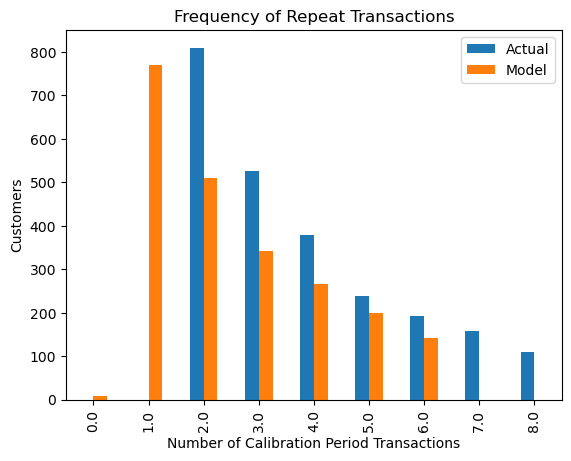

In [80]:
# Function to Plot the Comparison of Actual Values ​​and Model Predicted Values
plot_period_transactions(bgf)
plt.show()

### b. GAMMA-GAMMA Model Establishment

In [81]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [82]:
ggf.fit(cltv_df['frequency'], cltv_df['monetary']) # produces relevant function parameters as model output

<lifetimes.GammaGammaFitter: fitted with 2893 subjects, p: 3.79, q: 0.34, v: 3.73>

In [83]:
ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).head(10)

Customer ID
12346.0000     34.7855
12347.0000    726.7538
12349.0000    813.4300
12352.0000    190.3223
12356.0000   1261.8495
12357.0000   6172.3459
12358.0000    958.0482
12359.0000    436.1604
12360.0000    325.9717
12361.0000    115.0311
dtype: float64

In [84]:
ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).sort_values(ascending=False).head(10)

Customer ID
12357.0000   6172.3459
17450.0000   5457.7883
14091.0000   5022.9216
14088.0000   4792.1915
18102.0000   3533.3926
12409.0000   3228.0113
14646.0000   3115.7658
12454.0000   2940.2847
16684.0000   2866.3781
12415.0000   2851.5073
dtype: float64

In [85]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])

In [86]:
cltv_df.sort_values("expected_average_profit", ascending=False)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
Customer ID,,,,,,,,
12357.0000,0.0000,55.5714,2,5633.4650,0.0001,0.0003,0.0008,6172.3459
17450.0000,10.0000,62.7143,7,5321.5850,0.0000,0.0000,0.0000,5457.7883
14091.0000,6.2857,99.8571,2,4584.0450,0.0000,0.0002,0.0005,5022.9216
14088.0000,2.0000,60.2857,3,4512.9900,0.0000,0.0001,0.0003,4792.1915
18102.0000,53.2857,105.5714,89,3526.4424,0.0000,0.0000,0.0000,3533.3926
...,...,...,...,...,...,...,...,...
15359.0000,4.2857,99.1429,8,22.6687,0.0000,0.0000,0.0000,23.6490
17246.0000,27.2857,105.5714,2,19.4600,0.0011,0.0043,0.0124,23.3555
14610.0000,16.8571,73.5714,2,12.1750,0.0014,0.0057,0.0163,15.3763


### c. Calculation of CLTV with BG-NBD and GG model

In [87]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=3,  # 3 months-period
                                   freq="W",  # T frequency info.
                                   discount_rate=0.01) # The discount rate planned to be made on products during the process
cltv.head()

Customer ID
12346.0000    0.0002
12347.0000    3.2751
12349.0000   13.7464
12352.0000    0.3763
12356.0000    1.9081
Name: clv, dtype: float64

In [88]:
cltv = cltv.reset_index()

In [89]:
cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
# I have merged two dataframes by sharing them in Customer ID.

In [90]:
cltv_final.sort_values(by="clv", ascending=False).head(10) # clv == cltv

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
67,12497.0000,34.8571,92.1429,2,2563.8200,0.0042,0.0166,0.0480,2810.1798,142.8872
1671,15823.0000,51.1429,104.5714,3,1292.0500,0.0062,0.0245,0.0709,1372.9255,103.1798
83,12557.0000,50.1429,103.2857,4,1681.2950,0.0046,0.0180,0.0520,1758.7351,96.9996
1059,14564.0000,42.8571,105.1429,2,1302.8100,0.0044,0.0175,0.0508,1429.0021,76.9371
6,12358.0000,50.8571,104.5714,3,901.2367,0.0061,0.0240,0.0694,958.0482,70.4795
449,13373.0000,45.2857,104.8571,3,1424.9800,0.0038,0.0150,0.0435,1514.0405,69.8940
58,12477.0000,31.8571,89.1429,3,2352.2100,0.0023,0.0090,0.0260,2498.3637,68.8879
2127,16732.0000,46.8571,104.5714,3,1175.2767,0.0044,0.0175,0.0505,1248.9619,66.8987
42,12435.0000,48.5714,105.4286,4,1460.2225,0.0035,0.0136,0.0393,1527.6081,63.6585
221,12873.0000,40.5714,97.4286,2,826.6500,0.0052,0.0205,0.0595,907.4665,57.2302


In [91]:
# IMPORTANT NOTE: According to BG-NBD Theory; as the recency value of a regular customer (non-drop out) increases, the customer's probability of purchasing increases.
# (T value ~ recency value => !!!)

### d. Creating Segments Based on CLTV

In [92]:
cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

cltv_final.sort_values(by="clv", ascending=False).head(50)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
67,12497.0000,34.8571,92.1429,2,2563.8200,0.0042,0.0166,0.0480,2810.1798,142.8872,A
1671,15823.0000,51.1429,104.5714,3,1292.0500,0.0062,0.0245,0.0709,1372.9255,103.1798,A
83,12557.0000,50.1429,103.2857,4,1681.2950,0.0046,0.0180,0.0520,1758.7351,96.9996,A
1059,14564.0000,42.8571,105.1429,2,1302.8100,0.0044,0.0175,0.0508,1429.0021,76.9371,A
6,12358.0000,50.8571,104.5714,3,901.2367,0.0061,0.0240,0.0694,958.0482,70.4795,A
449,13373.0000,45.2857,104.8571,3,1424.9800,0.0038,0.0150,0.0435,1514.0405,69.8940,A
58,12477.0000,31.8571,89.1429,3,2352.2100,0.0023,0.0090,0.0260,2498.3637,68.8879,A
2127,16732.0000,46.8571,104.5714,3,1175.2767,0.0044,0.0175,0.0505,1248.9619,66.8987,A
42,12435.0000,48.5714,105.4286,4,1460.2225,0.0035,0.0136,0.0393,1527.6081,63.6585,A
221,12873.0000,40.5714,97.4286,2,826.6500,0.0052,0.0205,0.0595,907.4665,57.2302,A


In [93]:
cltv_final.groupby("segment").agg(
    {"count", "mean", "sum"})

Customer ID                     recency                        T                  frequency             monetary                   expected_purc_1_week              expected_purc_1_month              expected_purc_3_month               expected_average_profit                       clv                 
               mean           sum count    mean        sum count    mean        sum count      mean   sum count     mean         sum count                 mean    sum count                  mean    sum count                  mean     sum count                    mean         sum count    mean        sum count
segment                                                                                                                                                                                                                                                                                                               
D        15506.7265 11226870.0000   724 22.7170 16447.1429   724 87.9594 63682.5714   724   11.6064  8403   724 326.9102 236682.9841   724               0.0000 0.0252   724                0.0001 0.0991   724                0.0004  0.2832   724                338.0324 244735.4256   724  0.0819    59.2836   724
C        15325.2503 11080156.0000   723 23.3592 16888.7143   723 84.9972 61453.0000   723    5.0913  3681   723 333.4657 241095.7126   723               0.0003 0.1993   723                0.0011 0.7830   723                0.0031  2.2435   723                351.7963 254348.7239   723  0.7924   572.9409   723
B        15349.1895 11097464.0000   723 30.2146 21845.1429   723 89.8484 64960.4286   723    4.4191  3195   723 368.0842 266124.8549   723               0.0010 0.6958   723                0.0038 2.7373   723                0.0109  7.8671   723                389.1784 281376.0014   723  3.1319  2264.3624   723
A        15222.0069 11005511.0000   723 37.8453 27362.1429   723 95.3408 68931.4286   723    3.4786  2515   723 468.3474 338615.1853   723               0.0028 2.0273   723                0.0110 7.9888   723                0.0319 23.0563   723                498.2589 360241.1576   723 14.4013 10412.1718   723

In [94]:
# cltv_final.to_csv("cltv_prediction.csv")

## 3) CRM - Customer Segmentation with RFM(Recency, Frequency, Monetary)

**RFM Analysis; It is a technique used for customer segmentation. It enables customers to be divided into groups based on their purchasing habits and strategies and can be developed specifically for these groups.** <br>
* RFM Metrics:
* Recency (Actuality- When was the last time the customer shopped with us? Recency : 1 better than 10)
* Frequency (Transaction number - total number of purchases made by the customer), It is better to have large value.
* Monetary (Monetary Value: The money the customer left to us),  It is better to have large value.

Example: R=1, F=3, M= 4 => RFM Score (string concatination) = 134 <br>
**RFM Metrics must be translated into RFM scores. That means expressing all metrics in the same way. Some standardization is going to be done**

#### Data Preperation & Imports
**Dataset Story**: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II <br>
The data set named Online Retail II includes the sales of a UK-based online sales store between 01/12/2009 and 09/12/2011.<br>

In [96]:
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df3 = df_.copy()
df3.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.000,10.338,-9600.000,1.000,3.000,10.000,19152.000,107.424
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.000,4.689,-53594.360,1.250,2.100,4.210,25111.090,146.127
Customer ID,417534.000,15360.645,12346.000,13983.000,15311.000,16799.000,18287.000,1680.811


In [97]:
df3.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [98]:
df3.shape

(525461, 8)

In [101]:
df3["Description"].nunique() #What is the number of unique products?

4681

In [102]:
df3["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: count, dtype: int64

In [104]:
df3.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [106]:
df3["Invoice"].nunique() #It is the answer to how many different invoices have been issued.

28816

In [108]:
df3["TotalPrice"] = df3["Quantity"] * df3["Price"]

In [109]:
df3.groupby("Invoice").agg({"TotalPrice": "sum"}).head()

,TotalPrice
Invoice,
489434,505.300
489435,145.800
489436,630.330
489437,310.750
489438,2286.240


In [111]:
df3.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
TotalPrice          0
dtype: int64

In [112]:
df3 = df3[(df3['Quantity'] > 0)]

In [113]:
df3.dropna(inplace=True)

In [116]:
df3["Invoice"] = df3["Invoice"].astype('str')

In [117]:
df3 = df3[~df3["Invoice"].str.contains("C", na=False)]

In [118]:
df3.shape

(407695, 9)

### a. Calculating RFM Metrics

In [119]:
df3.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000


In [120]:
# Recency (Analysis Date(today) - Customer Last Purchase Date), 
# Frequency (Customer Total Purchase Number),
# Monetary(Customer Total Spending)

In [121]:
df3["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [122]:
today_date = dt.datetime(2024, 2, 6 )
type(today_date)

datetime.datetime

In [123]:
rfm = df3.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [124]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.000,4970,11,372.860
12347.000,4808,2,1323.320
12348.000,4879,1,222.160
12349.000,4848,3,2671.140
12351.000,4816,1,300.930


In [125]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4314.000,4896.270,96.944,4806.000,4823.000,4858.000,4941.000,5179.000
frequency,4314.000,4.454,8.169,1.000,1.000,2.000,5.000,205.000
monetary,4314.000,2047.289,8912.523,0.000,307.950,705.550,1722.802,349164.350


In [126]:
rfm = rfm[rfm["monetary"] > 0]
rfm.shape

(4312, 3)

### b. Calculating RFM Scores

In [127]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
# qcut() => qcut(GivenVariable, How Many Equal Pieces Will It Be Divided Into?, AfterSegmentationTags)
# Example:  0-100 segmentation =>  0-20 : (5), 20-40 : (4), 40-60 : (3), 60-80: (2), 80-100: (1)

In [130]:
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# If we get an error when the values in the Quantiles are the same, we use rank(method="first") => helps to assign the encountered first item to the proper class.

In [129]:
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [131]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [132]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4312.000,4896.173,96.861,4806.000,4823.000,4858.000,4941.000,5179.000
frequency,4312.000,4.456,8.170,1.000,1.000,2.000,5.000,205.000
monetary,4312.000,2048.238,8914.481,2.950,307.988,706.020,1723.142,349164.350


In [134]:
rfm.shape

(4312, 7)

In [136]:
rfm[rfm["RFM_SCORE"] == "55"] # champion segment (segment where promotions will be given)

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RFM_SCORE
Customer ID,,,,,,,
12415.000,4816,7,19543.840,5,5,5,55
12431.000,4814,13,4370.520,5,5,5,55
12471.000,4815,49,20139.740,5,5,5,55
12472.000,4810,13,11308.480,5,5,5,55
12474.000,4819,13,5048.660,5,5,5,55
...,...,...,...,...,...,...,...
18225.000,4806,15,7545.140,5,5,5,55
18226.000,4819,15,6650.830,5,5,5,55
18229.000,4807,10,3526.810,5,5,5,55


In [137]:
rfm[rfm["RFM_SCORE"] == "11"] # hibernating segment

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RFM_SCORE
Customer ID,,,,,,,
12355.000,5008,1,488.210,1,2,1,11
12362.000,5179,1,130.000,1,1,1,11
12366.000,5074,1,500.240,1,2,1,11
12368.000,5069,1,917.700,1,3,1,11
12378.000,5003,1,1407.700,1,4,1,11
...,...,...,...,...,...,...,...
15928.000,5097,1,293.530,1,2,1,11
15929.000,5085,1,594.000,1,3,1,11
15941.000,5078,1,405.000,1,2,1,11


### c. Creating & Analysing RFM Segments

In [138]:
# RFM naming with Regex
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [139]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                        mean count      mean count     mean count
segment                                                          
about_to_sleep      4858.819   343     1.201   343  441.320   343
at_Risk             4957.159   611     3.074   611 1188.878   611
cant_loose          4929.117    77     9.117    77 4099.450    77
champions           4812.119   663    12.554   663 6852.264   663
hibernating         5018.886  1015     1.126  1015  403.978  1015
loyal_customers     4841.287   742     6.830   742 2746.067   742
need_attention      4858.266   207     2.449   207 1060.357   207
new_customers       4813.580    50     1.000    50  386.199    50
potential_loyalists 4823.793   517     2.017   517  729.511   517
promising           4830.747    87     1.000    87  367.087    87

In [140]:
rfm[rfm["segment"] == "cant_loose"].head() # I fetched customers from "cant_loose" segment (with customerIDs)

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.000,4970,11,372.860,2,2,5,25,cant_loose
12380.000,4906,7,6951.490,2,5,5,25,cant_loose
12482.000,5017,29,23691.400,1,5,5,15,cant_loose
12510.000,4900,7,4195.450,2,5,5,25,cant_loose
12891.000,4899,8,509.500,2,3,5,25,cant_loose


In [141]:
rfm[rfm["segment"] == "cant_loose"].index # Index information corresponding to CustomerIDs

Index([12346.0, 12380.0, 12482.0, 12510.0, 12891.0, 12932.0, 13044.0, 13313.0, 13680.0, 13782.0, 13799.0, 13856.0, 14025.0, 14063.0, 14160.0, 14221.0, 14548.0, 14607.0, 14685.0, 14745.0, 15003.0, 15013.0, 15015.0, 15125.0, 15141.0, 15222.0, 15306.0, 15321.0, 15359.0, 15369.0, 15372.0, 15443.0, 15538.0, 15607.0, 15633.0, 15722.0, 15751.0, 15754.0, 15768.0, 15911.0, 15912.0, 16027.0, 16032.0, 16158.0, 16177.0, 16197.0, 16335.0, 16467.0, 16631.0, 16742.0, 16743.0, 16875.0, 16986.0, 17021.0,
       17032.0, 17092.0, 17113.0, 17157.0, 17188.0, 17230.0, 17268.0, 17426.0, 17448.0, 17454.0, 17512.0, 17578.0, 17602.0, 17651.0, 17940.0, 17969.0, 17988.0, 18009.0, 18051.0, 18064.0, 18094.0, 18251.0, 18258.0],
      dtype='float64', name='Customer ID')

In [142]:
new_df = pd.DataFrame()
new_df["new_customer_id"] = rfm[rfm["segment"] == "new_customers"].index

In [143]:
new_df["new_customer_id"] = new_df["new_customer_id"].astype(int)

In [144]:
# new_df.to_csv("new_customers.csv")

# It can also be converted into a SQL table instead of CSV. It is possible to report this SQL table 
# with a more elegant visual using the PowerBI procedure.

# rfm.to_csv("rfm.csv")

In [145]:
# FINAL COMMENTS:
# 1) Separate functions can be written for sub-process groups within our general function.
# This provides a more manageable structure to the intermediate layers in the program flow.
# 2) It may be important to rerun this RFM analysis process periodically. Ex: We can report the segments formed after running each month,
# but this follow-up period has an important place in the industry. For this follow-up, these periodical csv files are stored,
# comparisons are made and put into a report. 